**Author**: Chiin-Rui Tan (Mx.)

# Live GeoComputation Demo! Spatial Data Viz with Rubber-Sheet Algorithms (in 15mins)

## Demo Scenario = Data Science Research! In which European country do people eat the most cheese?

## Sourcing data!

![cheese_stats_raw_data.png](cheese_stats_raw_data.png)

_Source: International Dairy Federation and Statistics Canada_ | http://www.dairyinfo.gc.ca/index_e.php?s1=dff-fcil&s2=cons&s3=consglo&s4=tc-ft

## A Data Viz workflow for creating engaging Continguous Area Cartograms using R:

In [2]:
# Load necessary R packages
library(tmap)
library(tmaptools)
library(maptools)
library(cartogram)

Loading required package: sp
Checking rgeos availability: TRUE


In [3]:
# Load Europe spatialpolygondataframe (spdf) object that comes shipped with the tmap package
data(Europe)

In [4]:
# View different slots in this Europe object
slotNames(Europe)

[1] "data"        "polygons"    "plotOrder"   "bbox"        "proj4string"

In [9]:
# Eyeball the 'data' slot of the Europe object
head(Europe@data, n=5)

,iso_a3,name,sovereignt,continent,part,EU_Schengen,area,pop_est,pop_est_dens,gdp_md_est,gdp_cap_est,economy,income_grp,life_exp,well_being,HPI
5,ALB,Albania,Albania,Europe,Southern Europe,NA,27400.0000,3639453,132.82675,21810,5992.659,6. Developing region,4. Lower middle income,76.9,5.268937,54.05118
6,ALA,Aland,Finland,Europe,Northern Europe,NA,674.3813,27153,40.26357,1563,57562.700,2. Developed region: nonG7,1. High income: OECD,NA,NA,NA
7,AND,Andorra,Andorra,Europe,Southern Europe,NA,470.0000,83888,178.48511,3660,43629.601,2. Developed region: nonG7,2. High income: nonOECD,NA,NA,NA
10,ARM,Armenia,Armenia,Asia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
17,AUT,Austria,Austria,Europe,Western Europe,EU Schengen,82409.0000,8210281,99.62845,329500,40132.609,2. Developed region: nonG7,1. High income: OECD,80.9,7.346036,47.08514


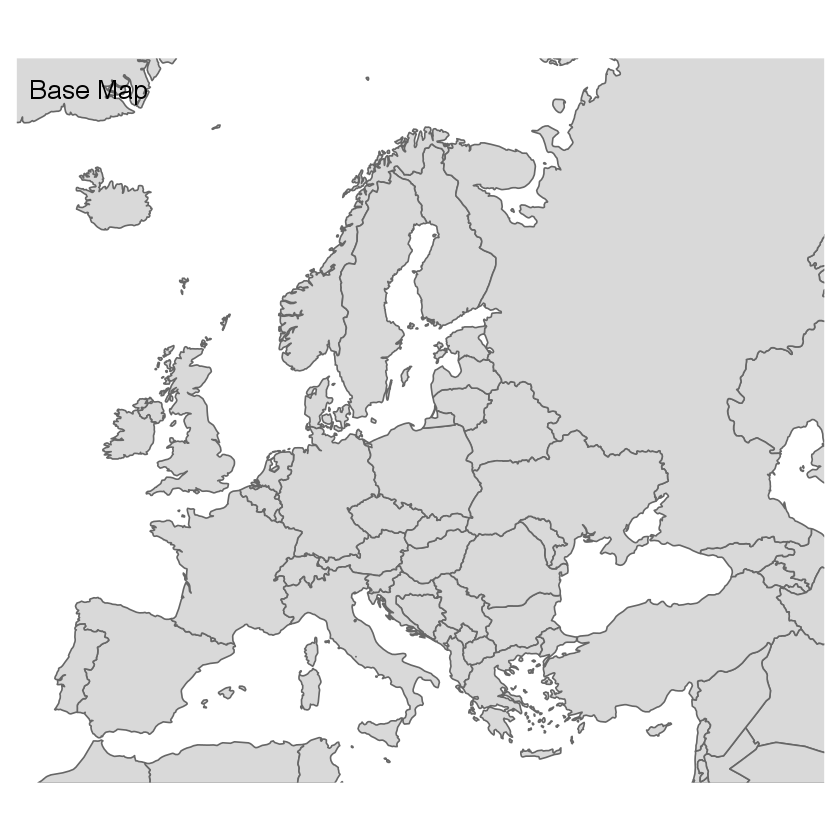

In [7]:
# Make a quick plot of the Europe object
base <- qtm(Europe, frame=F, title="Base Map")
base

In [9]:
# Read in pre-prepared csv of cheese stats data | replace my filepath with yours!
cheese_stats <- read.csv("~/Desktop/SpeakingEngagements/Dev_Picnic/cheese_stats.csv", sep=',', check.names=F)

In [10]:
# Eyeball cheese stats 
head(cheese_stats, n=5)

iso_a3,cheese_per_cap_2016
AUT,21.1
BEL,15.0
BGR,15.9
BLR,12.9
CHE,22.2


In [11]:
# Add cheese stats onto Europe spdf | i.e. SQL left outer join | note warning message
europe_cheese_stats <- append_data(shp=Europe, data=cheese_stats, key.shp="iso_a3", key.data="iso_a3", ignore.na=T)

Europe key variable "iso_a3" contains NA's, which are ignored
Under coverage: 39 out of 68 shape features did not get appended data. Run under_coverage() to get the corresponding feature id numbers and key values.


In [12]:
# Check join
head(europe_cheese_stats@data, n=5)

,iso_a3,name,sovereignt,continent,part,EU_Schengen,area,pop_est,pop_est_dens,gdp_md_est,gdp_cap_est,economy,income_grp,life_exp,well_being,HPI,cheese_per_cap_2016
5,ALB,Albania,Albania,Europe,Southern Europe,NA,27400.0000,3639453,132.82675,21810,5992.659,6. Developing region,4. Lower middle income,76.9,5.268937,54.05118,NA
6,ALA,Aland,Finland,Europe,Northern Europe,NA,674.3813,27153,40.26357,1563,57562.700,2. Developed region: nonG7,1. High income: OECD,NA,NA,NA,NA
7,AND,Andorra,Andorra,Europe,Southern Europe,NA,470.0000,83888,178.48511,3660,43629.601,2. Developed region: nonG7,2. High income: nonOECD,NA,NA,NA,NA
10,ARM,Armenia,Armenia,Asia,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
17,AUT,Austria,Austria,Europe,Western Europe,EU Schengen,82409.0000,8210281,99.62845,329500,40132.609,2. Developed region: nonG7,1. High income: OECD,80.9,7.346036,47.08514,21.1


In [13]:
# Identify the country rows which didn't have any cheese stats to join
no_cheese_countries <- under_coverage()
countries_to_cut <- no_cheese_countries$value
countries_to_cut

[1] ALB  ALA  AND  ARM  AZE  BIH  DZA  FRO  GEO  GGY  GRC  GRL  IMN  IRN  IRQ 
[16] ISR  JEY  JOR  KAZ  <NA> LBN  LIE  MAR  MCO  MDA  MKD  MLT  MNE  PRT  PSE 
[31] ROU  SAU  SMR  SRB  SVN  SYR  TUN  TUR  VAT 
67 Levels: ALA ALB AND ARM AUT AZE BEL BGR BIH BLR CHE CYP CZE DEU DNK ... VAT

[1] 39

In [14]:
# Cut out these countries from the merged spdf
cheese_countries <- europe_cheese_stats[!(europe_cheese_stats@data$iso_a3 %in% countries_to_cut), ]

In [15]:
# Check size of new trimmed object
dim(cheese_countries)

[1] 29 17

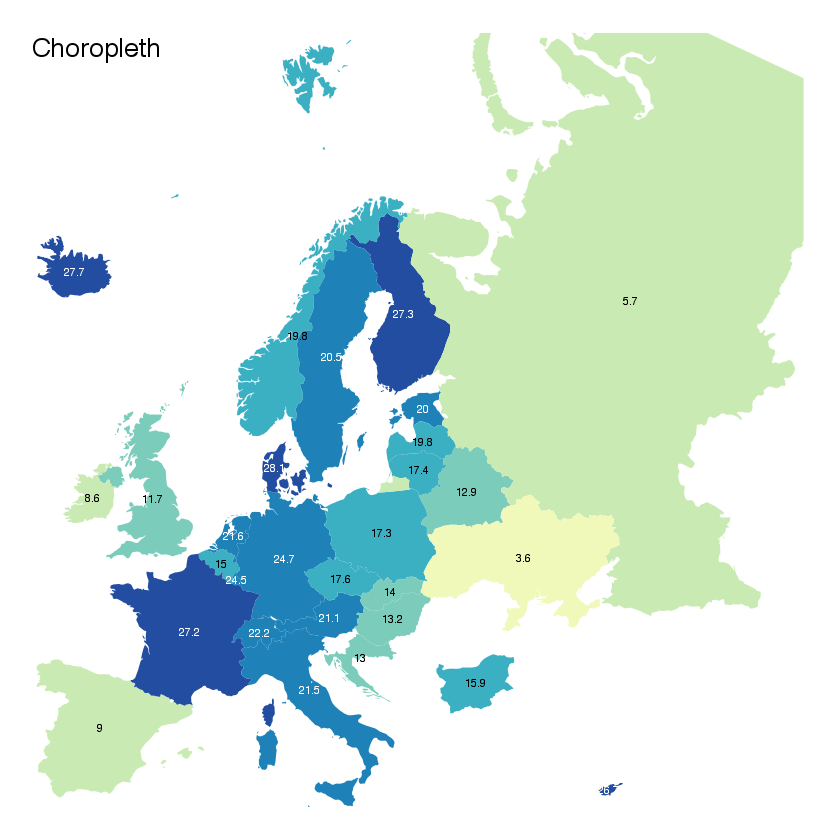

In [16]:
# Make Choropleth map
choropleth <- tm_shape(cheese_countries) +
    tm_fill("cheese_per_cap_2016", palette="YlGnBu") +
    tm_text("cheese_per_cap_2016", scale=0.5) +
    tm_layout(title="Choropleth", frame=F, legend.show=F)
choropleth

In [17]:
# Run Rubber-Sheet Distortion Algorithm to calculate resized spdf | continugous area cartogram
rubber_cheese <- cartogram(cheese_countries, "cheese_per_cap_2016")

Mean size error for iteration 1: 8.35662493102456
Mean size error for iteration 2: 5.29042222267668
Mean size error for iteration 3: 3.55860840663172
Mean size error for iteration 4: 2.50844142773027
Mean size error for iteration 5: 1.84886167769636
Mean size error for iteration 6: 1.49996541905631
Mean size error for iteration 7: 1.31453443906814
Mean size error for iteration 8: 1.2115006805585
Mean size error for iteration 9: 1.14973581151081
Mean size error for iteration 10: 1.11114707721786
Mean size error for iteration 11: 1.08603781276902
Mean size error for iteration 12: 1.06849031489188
Mean size error for iteration 13: 1.05543261275849
Mean size error for iteration 14: 1.04545602446878
Mean size error for iteration 15: 1.03770128792592


_# 'cartogram( )' runs an Optimisation Algorithm trying to, with minimal error, translate from 3D to 2D + whilst also preserving original topology_
***
![area_resizing_geocomp_demo.png](area_resizing_geocomp_demo.png)

_Inspired by: Ingeborg Groeneweg, Universiteit Utrecht_

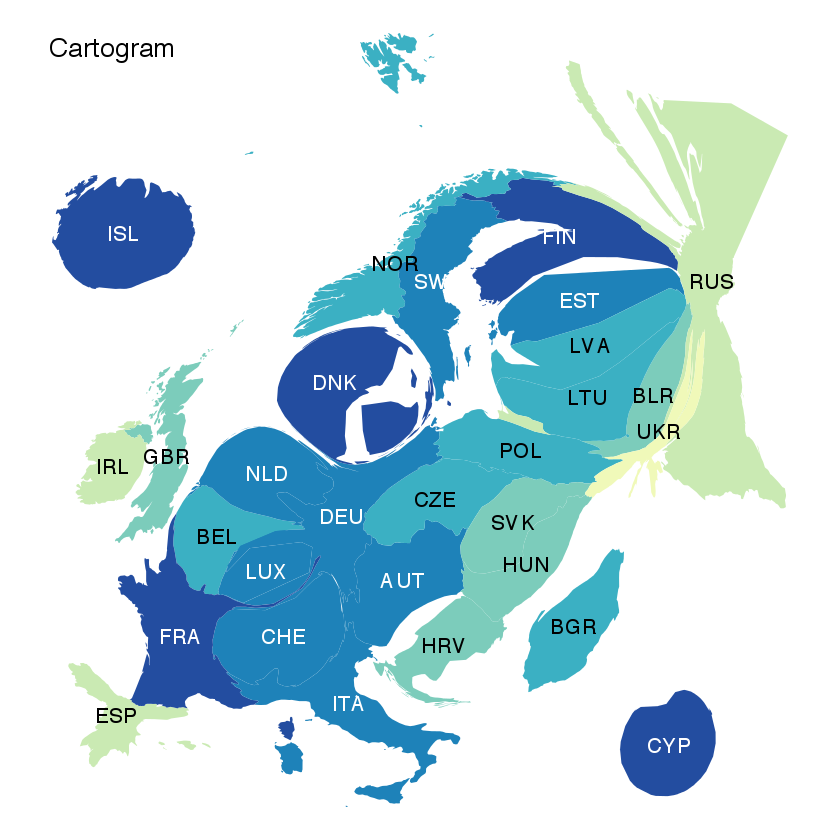

In [18]:
# Make Cartogram map
cartogram <- tm_shape(rubber_cheese) +
    tm_fill("cheese_per_cap_2016", palette="YlGnBu") +
    tm_text("iso_a3") +
    tm_layout(title="Cartogram", frame=F, legend.show=F)
cartogram

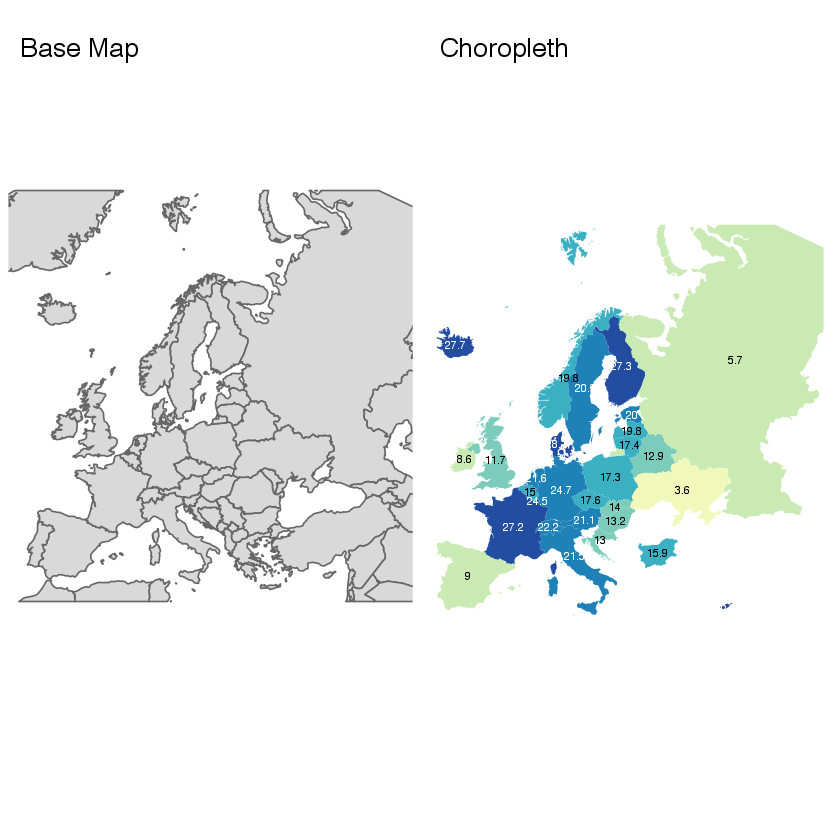

In [19]:
# Compare base map vs choropleth
tmap_arrange(base, choropleth, nrow=1)

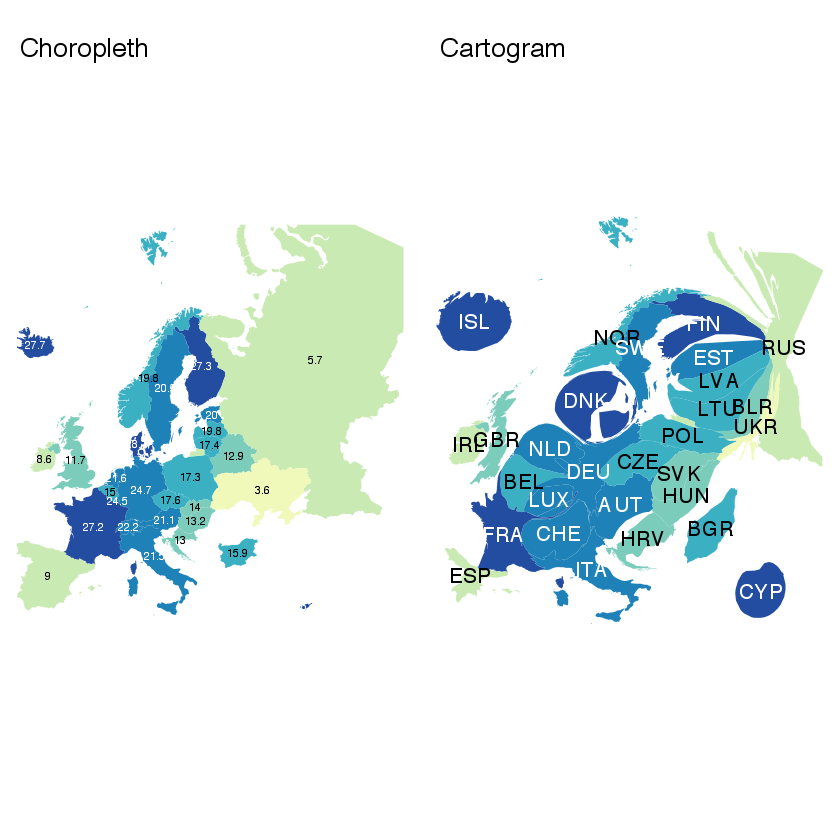

In [20]:
# Compare choropleth vs cartogram
tmap_arrange(choropleth, cartogram, nrow=1)

# et voilà!

![cc_license.png](cc_license.png)